### Import Libraries

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import seaborn as sns

### Load Dataset

In [210]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [211]:
print(data.info)

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [212]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [213]:
# Checking Null values for training set
data.isnull().sum()*100/data.shape[0]

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [214]:
# Replace specific values with integers
data['Gender']= data['Gender'].replace({'Male': 0, 'Female': 1})

# Rename columns 'Annual Income (k$)' and 'Spending Score (1-100)'
data = data.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})

data

/tmp/ipykernel_36/2248910622.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender']= data['Gender'].replace({'Male': 0, 'Female': 1})


,CustomerID,Gender,Age,Income,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


### Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

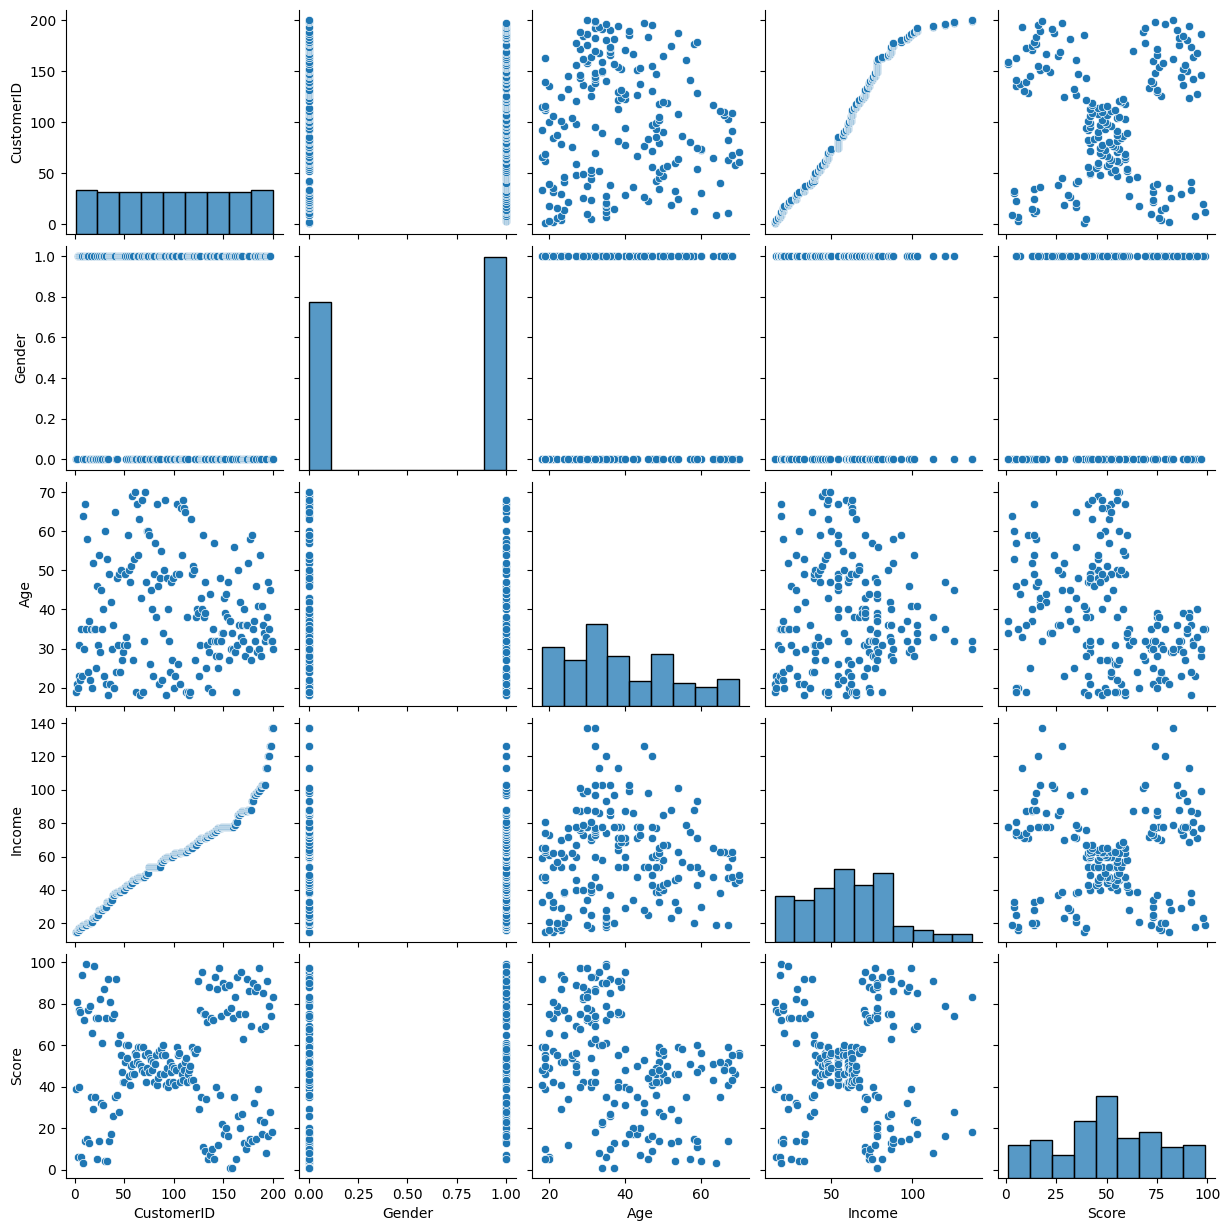

In [215]:
# Create a pair plot
sns.pairplot(data)

<function matplotlib.pyplot.show(close=None, block=None)>

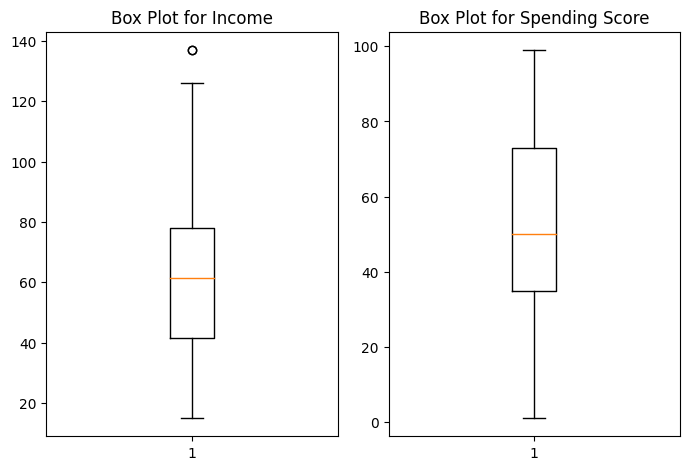

In [216]:
fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(2,2,1)
ax1.boxplot(data['Income'])
ax1.set_title('Box Plot for Income')

ax2 = fig.add_subplot(2,2,2)
ax2.boxplot(data['Score'])
ax2.set_title('Box Plot for Spending Score')
plt.tight_layout()
plt.show

In [217]:
# Drop the 'CustomerID', 'Gender', and 'Age' columns from the DataFrame.
data = data.drop(['CustomerID','Gender','Age'], axis=1)
print(data.shape)
data

(200, 2)


,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [218]:
x=np.array(data.values)
print(x[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


### K-Means

In [219]:
Sum_Square_Error = [] # for store cost or error value in list for choosing best value of K 

In [220]:
for k in range(1,15): 
    model = KMeans(n_clusters=k,n_init= 'auto',init='k-means++')
    model.fit(x)
    Sum_Square_Error.append(model.inertia_)

In [221]:
print(Sum_Square_Error)

[269981.2800000001, 186194.37333333335, 106348.37306211119, 73880.64496247195, 44448.45544793371, 37233.81451071001, 31676.36973205366, 26979.894603369605, 22874.05534759358, 20373.430812888662, 18485.830496757426, 17784.048811393703, 15921.220032051282, 13926.563247401533]


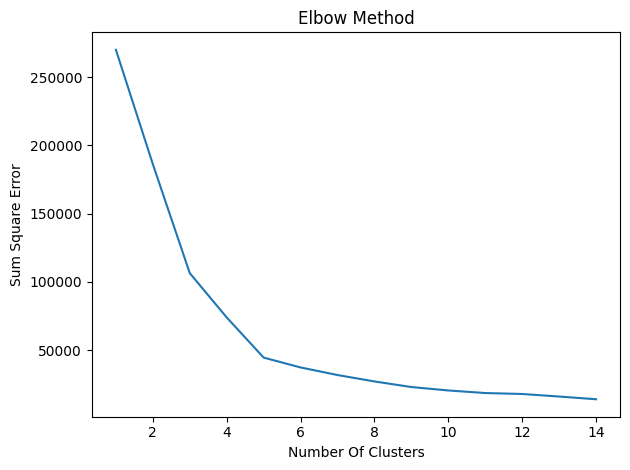

In [222]:
plt.plot(range(1,(len(Sum_Square_Error)+1)) ,Sum_Square_Error )
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum Square Error')
plt.tight_layout()
plt.show()

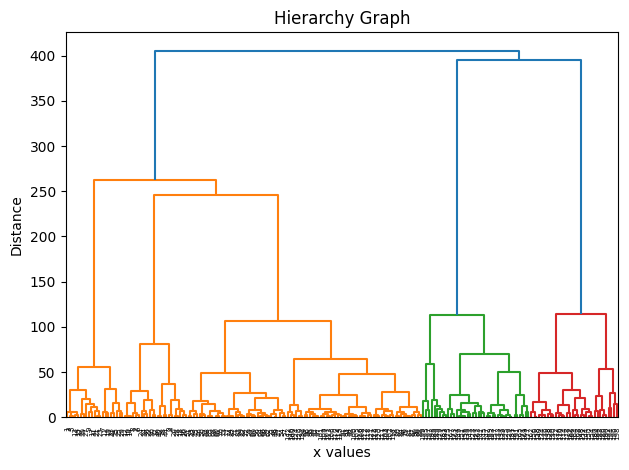

In [223]:
hc = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Hierarchy Graph')
plt.xlabel('x values')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [224]:
Model = KMeans(n_clusters=5,n_init='auto',init='k-means++')
Model.fit(x)
ypred = Model.predict(x)

centers = Model.cluster_centers_
error = Model.inertia_
lables = set(Model.labels_)

print('Centers : ',centers)
print('Cost : ',error)
print('Labels : ',lables)

Centers :  [[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]
Cost :  44448.45544793371
Labels :  {0, 1, 2, 3, 4}


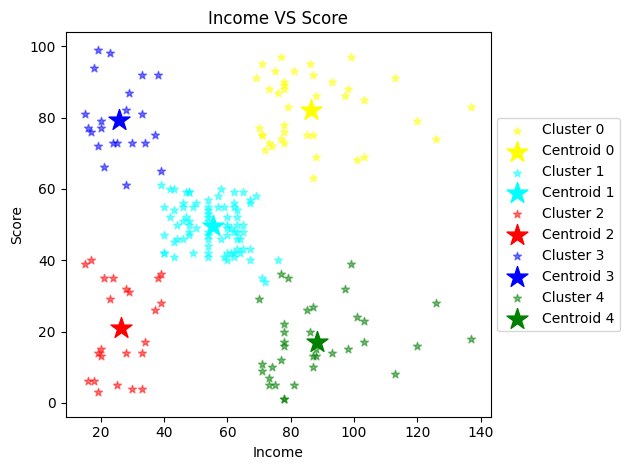

In [225]:
plt.scatter(x[ypred==0,0],x[ypred==0,1], color='yellow',alpha=0.5,label='Cluster 0',marker='*')
plt.scatter(centers[0,0],centers[0,1],color='yellow',s=250,marker='*',label='Centroid 0')

plt.scatter(x[ypred==1,0],x[ypred==1,1], color='cyan',alpha=0.5,label='Cluster 1',marker='*')
plt.scatter(centers[1,0],centers[1,1],color='cyan',s=250,marker='*',label='Centroid 1')

plt.scatter(x[ypred==2,0],x[ypred==2,1], color='red',alpha=0.5,label='Cluster 2',marker='*')
plt.scatter(centers[2,0],centers[2,1],color='red',s=250,marker='*',label='Centroid 2')

plt.scatter(x[ypred==3,0],x[ypred==3,1], color='blue',alpha=0.5,label='Cluster 3',marker='*')
plt.scatter(centers[3,0],centers[3,1],color='blue',s=250,marker='*',label='Centroid 3')

plt.scatter(x[ypred==4,0],x[ypred==4,1], color='green',alpha=0.5,label='Cluster 4',marker='*')
plt.scatter(centers[4,0],centers[4,1],color='green',s=250,marker='*',label='Centroid 4')

   
plt.xlabel('Income')
plt.ylabel('Score')
plt.title('Income VS Score')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.show()